# word2Vec


In [48]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
plt.style.use("ggplot")

In [4]:
# 분석 문장
corpus = [
          "king brave man",
          "king queen",
          "queen beautiful women"
]

In [5]:
words = []

for text in corpus:
  print("text =", text)
  print("text_split(" ") = ", text.split(" "))
  for word in text.split(" "):
    # 중복 단어 추가 안함
    if word not in words:
      print("word =",word)
      words.append(word)
  print("="*100)
print("words_list = ",words)

text = king brave man
text_split() =  ['king', 'brave', 'man']
word = king
word = brave
word = man
text = king queen
text_split() =  ['king', 'queen']
word = queen
text = queen beautiful women
text_split() =  ['queen', 'beautiful', 'women']
word = beautiful
word = women
words_list =  ['king', 'brave', 'man', 'queen', 'beautiful', 'women']


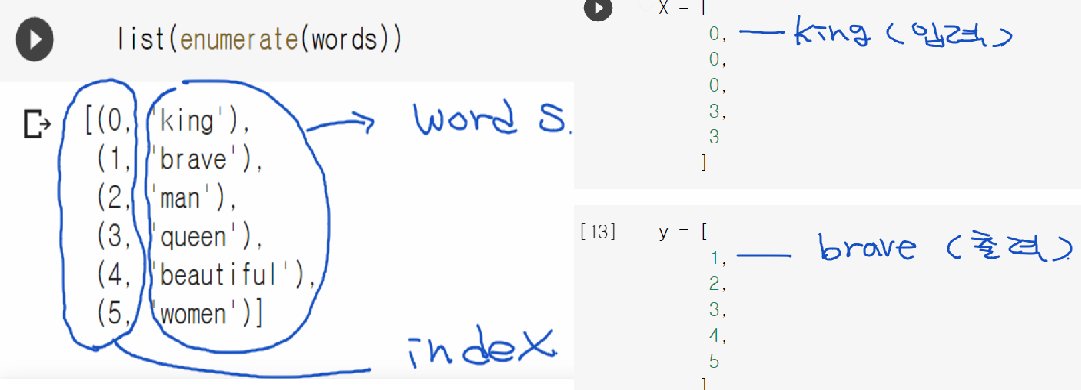

In [6]:
# 입력
X = [
     0,0,0,3,3
]

# 출 력
y = [1, 2, 3,4, 5]

# 중복 제거한 단어 개수
ONE_HOT_DIM = 6

In [7]:
# X 원-핫 인코딩
X_onehot = np.eye(ONE_HOT_DIM)[X]

# 타입 변환
X_onehot = np.array(X_onehot, dtype = np.float32)
print("X_onehot\n",X_onehot)

# y 원-핫 인코딩
y_onehot = np.eye(ONE_HOT_DIM)[y]

# 타입 변환
y_onehot = np.array(y_onehot, dtype = np.float32)
print("y_onehot\n",y_onehot)

X_onehot
 [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
y_onehot
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [8]:
model = Sequential()

model.add(Dense(2, input_dim = 6))

model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 14        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 18        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['acc'])
model.fit(X_onehot, y_onehot, epochs = 3000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 7ms/step - loss: 1.3866 - acc: 0.4000
Epoch 502/3000
1/1 [==============================] - 0s 12ms/step - loss: 1.3855 - acc: 0.4000
Epoch 503/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.3845 - acc: 0.4000
Epoch 504/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.3834 - acc: 0.4000
Epoch 505/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.3823 - acc: 0.4000
Epoch 506/3000
1/1 [==============================] - 0s 23ms/step - loss: 1.3813 - acc: 0.4000
Epoch 507/3000
1/1 [==============================] - 0s 13ms/step - loss: 1.3802 - acc: 0.4000
Epoch 508/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.3792 - acc: 0.4000
Epoch 509/3000
1/1 [==============================] - 0s 14ms/step - loss: 1.3781 - acc: 0.4000
Epoch 510/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.3771 - acc: 0.4000
Epoch 511/3000
1/1 [==

In [10]:
# 곱해지는 값 (weight)
w1 = model.layers[1].get_weights()[0]

# 더해지는 값 (bias)
b1 = model.layers[1].get_weights()[1]

In [11]:
vectors = w1 +b1
vectors.T

array([[-1.7188604 ,  0.04082549],
       [ 2.413704  ,  3.1222324 ],
       [ 2.2138853 ,  2.4422238 ],
       [ 2.4354825 ,  3.3902135 ],
       [-0.22013128, -0.42551893],
       [-0.9705952 , -2.8442626 ]], dtype=float32)

In [37]:
w_df = pd.DataFrame(vectors.T, columns = ['w1', 'w2'])
w_df["word"] = ["미정", "brave", 'man', 'queen', 'beautiful','women']
w_df = w_df[["word", "w1", "w2"]]
w_df

,word,w1,w2
0,미정,-1.718860,0.040825
1,brave,2.413704,3.122232
2,man,2.213885,2.442224
3,queen,2.435483,3.390213
4,beautiful,-0.220131,-0.425519
5,women,-0.970595,-2.844263


In [38]:
w_df.loc[0] = ["king",1,1]
w_df = w_df.set_index("word")
w_df

,w1,w2
word,,
king,1.000000,1.000000
brave,2.413704,3.122232
man,2.213885,2.442224
queen,2.435483,3.390213
beautiful,-0.220131,-0.425519
women,-0.970595,-2.844263


In [39]:
print("queen\n",w_df.loc['queen'])
print()
print("beautiful\n",w_df.loc['beautiful'])

print()
print("beautiful word vector\n",w_df.loc['queen'] * w_df.loc['beautiful'])

queen
 w1    2.435483
w2    3.390213
Name: queen, dtype: float32

beautiful
 w1   -0.220131
w2   -0.425519
Name: beautiful, dtype: float32

beautiful word vector
 w1   -0.536126
w2   -1.442600
dtype: float32


In [40]:
w_df.loc['beautiful'] = w_df.loc['queen']  * w_df.loc['beautiful']
w_df

,w1,w2
word,,
king,1.000000,1.000000
brave,2.413704,3.122232
man,2.213885,2.442224
queen,2.435483,3.390213
beautiful,-0.536126,-1.442600
women,-0.970595,-2.844263


In [45]:
w_df.loc["women"] = w_df.loc["queen"] * w_df.loc["women"]
w_df

,w1,w2
word,,
king,1.000000,1.000000
brave,2.413704,3.122232
man,2.213885,2.442224
queen,2.435483,3.390213
beautiful,-0.536126,-1.442600
women,-14.021457,-110.828339


In [47]:
w_df.reset_index(inplace=True)

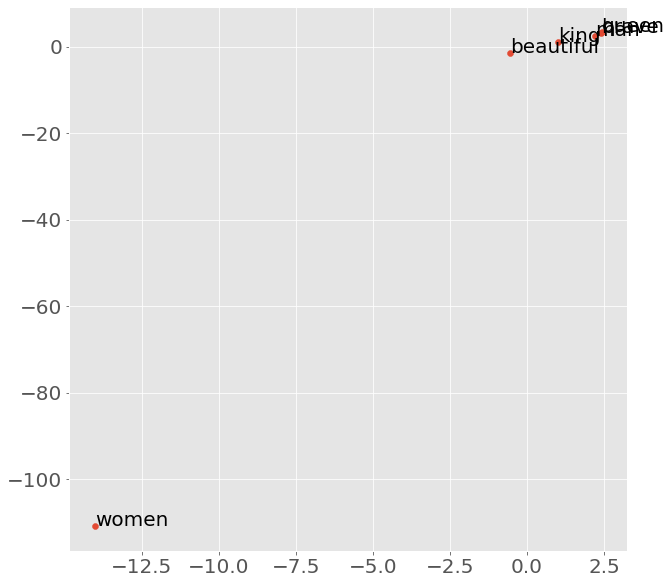

In [58]:
plt.rcParams["figure.figsize"] =(10,10)
plt.rcParams["font.size"] = 20
fig,ax = plt.subplots()

ax.scatter(w_df["w1"], w_df["w2"])

for i,txt in enumerate(w_df["word"]):
    ax.annotate(txt, (w_df.loc[i]["w1"],w_df.loc[i]["w2"] ))

In [56]:
for i, text in enumerate(w_df['word']):
  print("i=", i)
  print("text =",text)
  print('w_df.loc[i]["w1"]',w_df.loc[i]["w1"])
  print('w_df.loc[i]["w2"]',w_df.loc[i]["w2"])
  print("="*100)

i= 0
text = king
w_df.loc[i]["w1"] 1.0
w_df.loc[i]["w2"] 1.0
i= 1
text = brave
w_df.loc[i]["w1"] 2.413704
w_df.loc[i]["w2"] 3.1222324
i= 2
text = man
w_df.loc[i]["w1"] 2.2138853
w_df.loc[i]["w2"] 2.4422238
i= 3
text = queen
w_df.loc[i]["w1"] 2.4354825
w_df.loc[i]["w2"] 3.3902135
i= 4
text = beautiful
w_df.loc[i]["w1"] -0.5361259
w_df.loc[i]["w2"] -1.4426
i= 5
text = women
w_df.loc[i]["w1"] -14.021457
w_df.loc[i]["w2"] -110.82834


# Word2Vec (라이브리러리 사용)

In [59]:
from gensim.models import Word2Vec

In [60]:
data = [
        ['king', 'brave','man'],
        ['king', 'love', 'queen'],
        ['queen', 'beautiful', 'women']
]

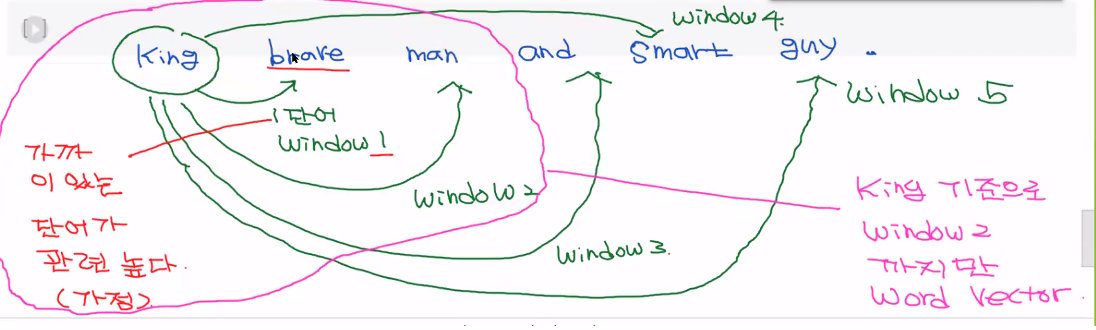

In [62]:
# size = 2 : 계산한 word vector 칸수 ,default =100
# min_count = 1 : 1번이라도 나온 단어는 다 word vector로 저장
word2_vec =Word2Vec(data, size =2, window =2, min_count = 1)

In [66]:
# 어떤 단어계산했는지 확인
keys = word2_vec.wv.vocab.keys()
keys

dict_keys(['king', 'brave', 'man', 'love', 'queen', 'beautiful', 'women'])

In [67]:
# king의 워드 벡터
word2_vec.wv["king"]

array([ 0.13958465, -0.07789097], dtype=float32)

In [70]:
key_list = []
value0_list = []
value1_list = []

for key in keys:
  print("key =",key)
  print("word_vector  =", word2_vec.wv[key])
  print("word_vector w1 =", word2_vec.wv[key][0])
  print("word_vector w2 =", word2_vec.wv[key][1])
  key_list.append(key)
  value0_list.append(word2_vec.wv[key][0])
  value1_list.append(word2_vec.wv[key][1])
  print("=" *100)

key = king
word_vector  = [ 0.13958465 -0.07789097]
word_vector w1 = 0.13958465
word_vector w2 = -0.07789097
key = brave
word_vector  = [ 0.15166436 -0.10536614]
word_vector w1 = 0.15166436
word_vector w2 = -0.10536614
key = man
word_vector  = [0.10850373 0.20530081]
word_vector w1 = 0.10850373
word_vector w2 = 0.20530081
key = love
word_vector  = [0.00673607 0.13318436]
word_vector w1 = 0.0067360695
word_vector w2 = 0.13318436
key = queen
word_vector  = [ 0.2460787  -0.07944199]
word_vector w1 = 0.2460787
word_vector w2 = -0.07944199
key = beautiful
word_vector  = [-0.09594776 -0.08402322]
word_vector w1 = -0.095947765
word_vector w2 = -0.08402322
key = women
word_vector  = [0.16423722 0.14832063]
word_vector w1 = 0.16423722
word_vector w2 = 0.14832063


In [72]:
plt.rcParams["fogure"]

[0.13958465,
 0.15166436,
 0.10850373,
 0.0067360695,
 0.2460787,
 -0.095947765,
 0.16423722]

In [73]:
w_df = pd.DataFrame({
    "word" : key_list,
    "x1" : value0_list,
    "x2" : value1_list
})

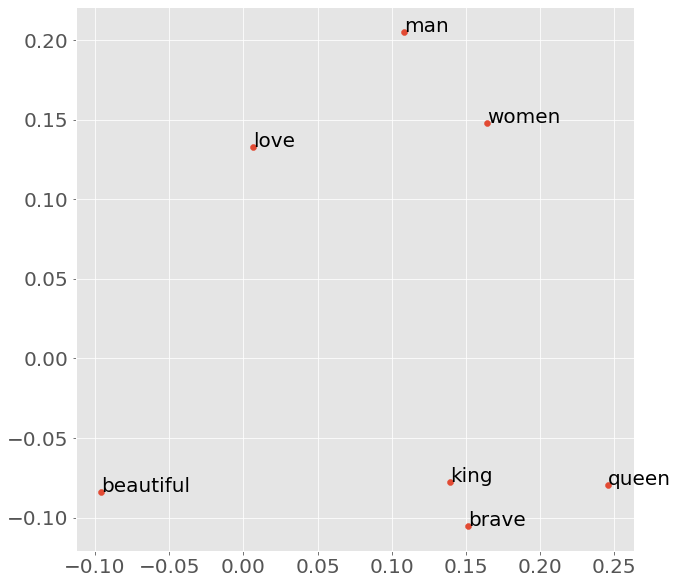

In [75]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots()
ax.scatter(w_df['x1'], w_df['x2'])
for i, txt in enumerate(w_df['word']):
  ax.annotate(txt, (w_df['x1'][i], w_df['x2'][i]))

# 실습


## Word2Vector 신경망으로 구현
- 169 ~ 184

In [76]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
plt.style.use("ggplot")

In [78]:
# 분석 문장
corpus = [
          "king brave man",
          "king queen",
          "queen beautiful women"
]

In [79]:
words = []

for text in corpus:
  # 공백 기준으로 분리
  for word in text.split(" "):
    # 중복 단어 추가 안함
    if word not in words:
      words.append(word)

print(words)

['king', 'brave', 'man', 'queen', 'beautiful', 'women']


In [80]:
# 입력
X = [
     0,0,0,3,3
]

# 출 력
y = [1, 2, 3,4, 5]

# 중복 제거한 단어 개수
ONE_HOT_DIM = 6

In [81]:
# 원-핫 인코딩 

# 칸 6개로 인코딩
X_onehot = np.eye(ONE_HOT_DIM)[X]

# 타입 변환
X_onehot = np.array(X_onehot, dtype = np.float32)

# 칸 6개로 인코딩
y_onehot = np.eye(ONE_HOT_DIM)[y]

# 타입 변환
y_onehot = np.array(y_onehot, dtype = np.float32)

In [82]:
# 모델 구축
model = Sequential()

model.add(Dense(2,  input_dim = 6))

model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 18        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 모델 컴파일
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = 0.001)
)

model.fit(X_onehot, y_onehot, epochs =3000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 10ms/step - loss: 1.2178
Epoch 502/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.2171
Epoch 503/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.2164
Epoch 504/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.2156
Epoch 505/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.2149
Epoch 506/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.2142
Epoch 507/3000
1/1 [==============================] - 0s 13ms/step - loss: 1.2135
Epoch 508/3000
1/1 [==============================] - 0s 12ms/step - loss: 1.2128
Epoch 509/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.2121
Epoch 510/3000
1/1 [==============================] - 0s 14ms/step - loss: 1.2113
Epoch 511/3000
1/1 [==============================] - 0s 18ms/step - loss: 1.2106
Epoch 512/3000
1/1 [==============================] - 0s 19ms/step - loss: 1.2099


In [86]:
# 모델이 학습한 weight
w1 = model.layers[1].get_weights()[0]

# 모델이 학습한 bias
b1 = model.layers[1].get_weights()[1]

# 벡터 계산
vectors = w1 +b1

vectors.T

array([[-2.2010303 ,  0.11919034],
       [ 1.4459171 ,  1.7183064 ],
       [ 1.3576038 ,  2.2098396 ],
       [ 1.7517923 ,  1.348366  ],
       [-0.24198863, -1.2464101 ],
       [-0.6577563 , -1.5717554 ]], dtype=float32)

In [90]:
# 벡터값을 데이터프레임으로 변환
w_df = pd.DataFrame(vectors.T, columns = ['x1', 'x2'])

# 'words' 컬럼 추가
w_df["word"] =  words

# 열 순서 재배치
w_df = w_df[["word", "x1", "x2"]]

# 열 'word'를 인덱스로 설정
w_df = w_df.set_index("word")

# king의 속성값 변환
w_df.loc['king'] = [1, 1]


In [91]:
w_df.loc['beautiful'] = w_df.loc['queen'] * w_df.loc['beautiful']

w_df.loc['women'] = w_df.loc['queen'] * w_df.loc['women']

In [92]:
w_df.reset_index(inplace = True)

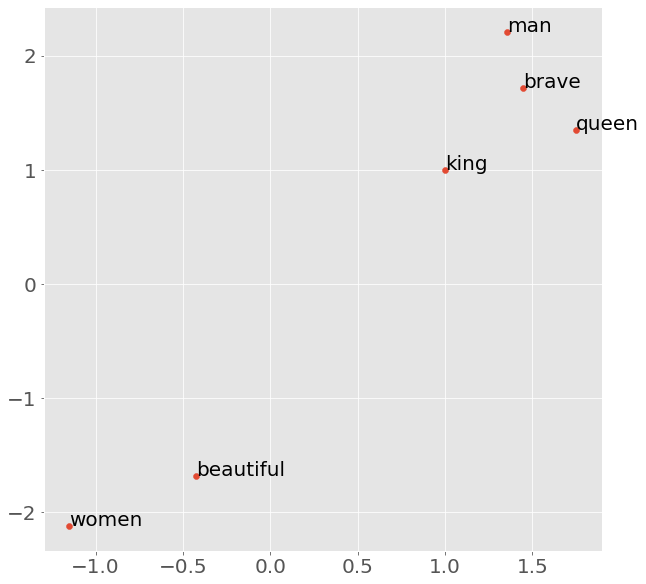

In [94]:
plt.rcParams["figure.figsize"] =(10,10)
plt.rcParams["font.size"] = 20
fig,ax = plt.subplots()

ax.scatter(w_df["x1"], w_df["x2"])

for i,txt in enumerate(w_df["word"]):
    ax.annotate(txt, (w_df.loc[i]["x1"],w_df.loc[i]["x2"] ))

## Word2Vector genism제공 라이브러리로 구현

- 186 ~192

In [100]:
from gensim.models import Word2Vec
import pandas as pd

In [101]:
# 변환할 문장
data = [
        ['king', 'brave','man'],
        ['king', 'love', 'queen'],
        ['queen', 'beautiful', 'women']
]

In [102]:
# size = 2 : 계산한 word vector 칸수 ,default =100
# min_count = 1 : 1번이라도 나온 단어는 다 word vector로 저장
word2_vec =Word2Vec(data, size =2, window =2, min_count = 1)

In [103]:
# 어떤 단어계산했는지 확인
keys = word2_vec.wv.vocab.keys()
keys

dict_keys(['king', 'brave', 'man', 'love', 'queen', 'beautiful', 'women'])

In [104]:
# 단어 저장 리스트
key_list = []

# 벡터값[0] 저장 리스트
value0_list = []

# 벡터값[1] 저장 리스트
value1_list = []

for key in keys:
  print("key =",key)
  print("word_vector  =", word2_vec.wv[key])
  print("word_vector w1 =", word2_vec.wv[key][0])
  print("word_vector w2 =", word2_vec.wv[key][1])
  key_list.append(key)
  value0_list.append(word2_vec.wv[key][0])
  value1_list.append(word2_vec.wv[key][1])
  print("=" *100)

key = king
word_vector  = [ 0.13958465 -0.07789097]
word_vector w1 = 0.13958465
word_vector w2 = -0.07789097
key = brave
word_vector  = [ 0.15166436 -0.10536614]
word_vector w1 = 0.15166436
word_vector w2 = -0.10536614
key = man
word_vector  = [0.10850373 0.20530081]
word_vector w1 = 0.10850373
word_vector w2 = 0.20530081
key = love
word_vector  = [0.00673607 0.13318436]
word_vector w1 = 0.0067360695
word_vector w2 = 0.13318436
key = queen
word_vector  = [ 0.2460787  -0.07944199]
word_vector w1 = 0.2460787
word_vector w2 = -0.07944199
key = beautiful
word_vector  = [-0.09594776 -0.08402322]
word_vector w1 = -0.095947765
word_vector w2 = -0.08402322
key = women
word_vector  = [0.16423722 0.14832063]
word_vector w1 = 0.16423722
word_vector w2 = 0.14832063


In [105]:
# 데이터 프레임 생성
w_df = pd.DataFrame({
    "word" : key_list,
    "x1" : value0_list,
    "x2" : value1_list
})

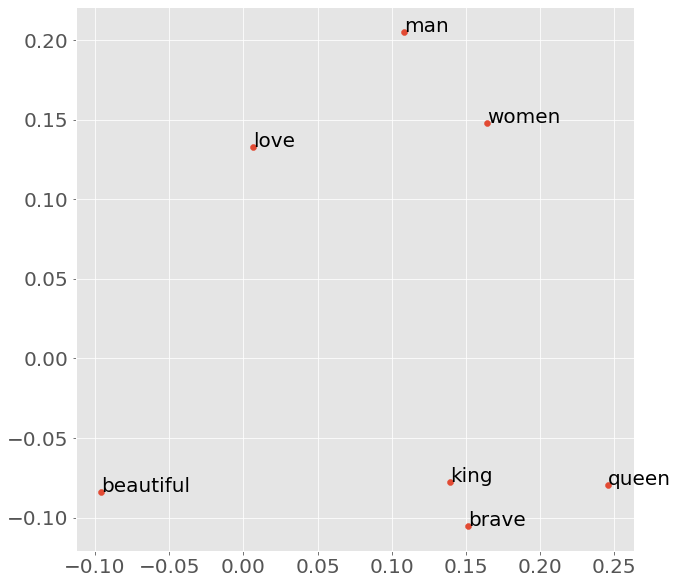

In [106]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots()
ax.scatter(w_df['x1'], w_df['x2'])
for i, txt in enumerate(w_df['word']):
  ax.annotate(txt, (w_df['x1'][i], w_df['x2'][i]))